<a href="https://colab.research.google.com/github/Neha609/Machine-Learning-Projects/blob/gh-pages/Phishing_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Phishing Detector using LR

You don't need to limit yourself to the number of rows/cells provided. You can add additional rows in each section to add more lines of code.

**Happy coding!**

# Initiation

In [ ]:
#Import Modules
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [ ]:
#Load Dataset
Df_Phishing = np.loadtxt('phishing.txt', delimiter=',')


In [ ]:
#Create X and Y data 
X = Df_Phishing[:,0:30]
y = Df_Phishing[:,30:31]

In [ ]:
#Printing the response
print('Reponse is :',np.unique(y))

Reponse is : [-1.  1.]


# Excercise 1

In [ ]:
#Spliting data into Test and Train Part
#Using 70% of data as training data and remaining 30% as test data.
X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3, random_state = 1 ,stratify = y)

y_train = np.array(y_train.ravel())
y_test = np.array(y_test.ravel())

In [ ]:
#Train and Evaluate data
log_reg = LogisticRegression(C = 100.0,random_state=1)
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)


In [ ]:
#Print the Coefficient
print(log_reg.coef_)

[[ 6.86563360e-01 -1.82569714e-01 -6.99979031e-01  2.49842660e-01
  -2.89201648e-03  4.55396221e+00  5.87940187e-01  1.60874635e+00
  -4.54647801e-03 -2.18059714e-01  7.15642607e-01 -5.36021611e-01
   1.89714929e-01  3.31306284e+00  7.94614524e-01  9.34960776e-01
  -4.33294392e-01 -3.20995408e-02 -1.12795206e+00  1.62700516e-01
   2.64792842e-01 -1.45938104e-01 -4.48434933e-01  4.11982061e-02
   5.73954898e-01  8.03646174e-01  1.31947122e-01  6.19041802e-01
   9.89063126e-01  2.36881642e-01]]


In [ ]:
#Print the Misclassified Samples
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 249


In [ ]:
#Print the Accuracy Score
print('Accuracy : %.2f'%accuracy_score(y_test,y_pred))

Accuracy : 0.92


In [ ]:
#Print the Score of  Model
print('Accuracy :%.2f'%log_reg.score(X_test,y_test))

Accuracy :0.92


# Excercise 2

In [ ]:
#Train and Evaluate data with only two input parameters
log_Reg1 = LogisticRegression(C= 100.0,random_state=1)
log_Reg1.fit(X_train[:,[5,13]],y_train)
y_pred = log_Reg1.predict(X_test[:,[5,13]])

In [ ]:
#Print the Misclassified Samples
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 543


In [ ]:
#Print the Accuracy Score
print('Accuracy : %.2f'%accuracy_score(y_test,y_pred))

Accuracy : 0.84


In [ ]:
#Print the Score of  Model
print('Accuracy :%.2f'%log_Reg1.score(X_test[:,[5,13]],y_test))

Accuracy :0.84


# Ploting the samples

In [ ]:
#Defining a ploting function 
def Ploting_decision(X,y,classifier,test_idx=None,resolution=0.02):
    
    #Setup marker generators and color map
    marker = ('s','x','o','^','v')
    colors = ('red','pink','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min()-1,X[:, 0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:, 1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha = 0.3 , cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,
                   c=colors[idx],marker=marker[idx],label=cl,edgecolor = 'black')
        
    if test_idx:
        X_test , y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',edgecolor = 'black', alpha=1.0,linewidth = 1,
                   marker= 'o',s = 100, label = 'test set')

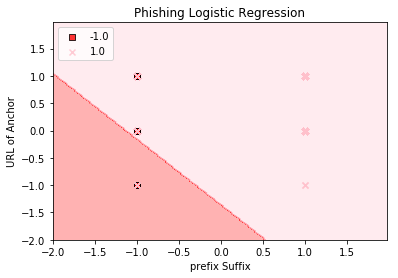

In [ ]:
#Plot the decision Boundary
Ploting_decision(X_test[:,[5,13]],y_test, classifier=log_Reg1)

plt.xlabel('prefix Suffix')
plt.ylabel('URL of Anchor')
plt.legend(loc = 'upper left')
plt.title('Phishing Logistic Regression')
plt.show()
